In [2]:
# Base libraries
import pandas as pd
import numpy as np

#pd.set_option('display.max_columns', None)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

In [5]:
from scipy.stats import norm

# Random variable distributions

Refer to the numerical.csv dataset that you previously saved.

Instructions
Use the numerical variables from our dataset this week.
Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [4]:
numerical=pd.read_csv('numerical_cleaned.csv')


customer_lifetime_value          0.0
income                           0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
total_claim_amount               0.0
dtype: float64

# Plotting before transformation

In [10]:
columns_to_plot = ["customer_lifetime_value", "income", "monthly_premium_auto", 
                   "months_since_last_claim", "months_since_policy_inception", 
                   "number_of_open_complaints", "number_of_policies", 
                   "total_claim_amount"]

/Users/Anne-so1/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Anne-so1/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Anne-so1/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Anne-so1/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

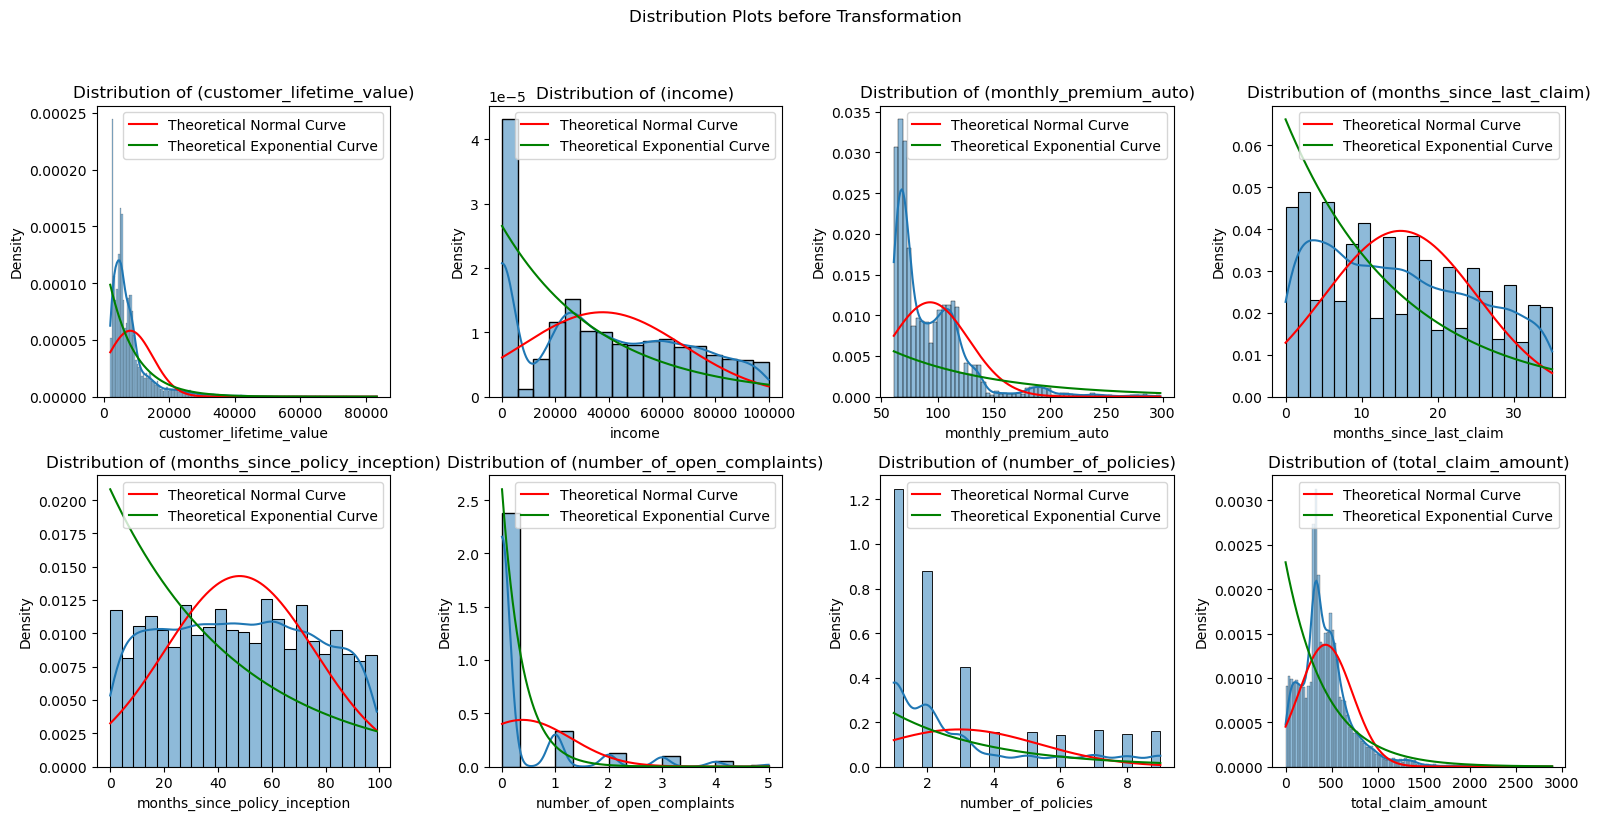

In [12]:
from scipy.stats import norm, expon
# Set up the subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.suptitle('Distribution Plots before Transformation', y=1.02)

# Create distribution plots for each column
for col, ax in zip(columns_to_plot, axes.flatten()):
    sns.histplot(numerical[col], kde=True, ax=ax, stat='density')  # Use stat='density' for probability density estimation
    
    # Add theoretical normal curve
    x = np.linspace(numerical[col].min(), numerical[col].max(), 1000)
    normal_curve = norm.pdf(x, loc=numerical[col].mean(), scale=numerical[col].std())
    ax.plot(x, normal_curve, color='red', label='Theoretical Normal Curve')
    
    # Add theoretical exponential curve
    exponential_curve = expon.pdf(x, scale=numerical[col].mean())  # Exponential distribution with mean as scale parameter
    ax.plot(x, exponential_curve, color='green', label='Theoretical Exponential Curve')
    
    ax.set_title(f'Distribution of ({col})')
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

In [9]:
##CONCLUSION##
##exponential distribution (green): 
    #number_of_open_complaints
    #customer_lifetime_value ?
    #income?

##normal distribution(red): (income?) 
    #total_claim_amount
##no pattern:
    #months_since_policy_inception
    #number_of_policies
    #(monthly_premium_auto) 
    #(months_since_last_claim) 

# Plot after Log transform

/Users/Anne-so1/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Anne-so1/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Anne-so1/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Anne-so1/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

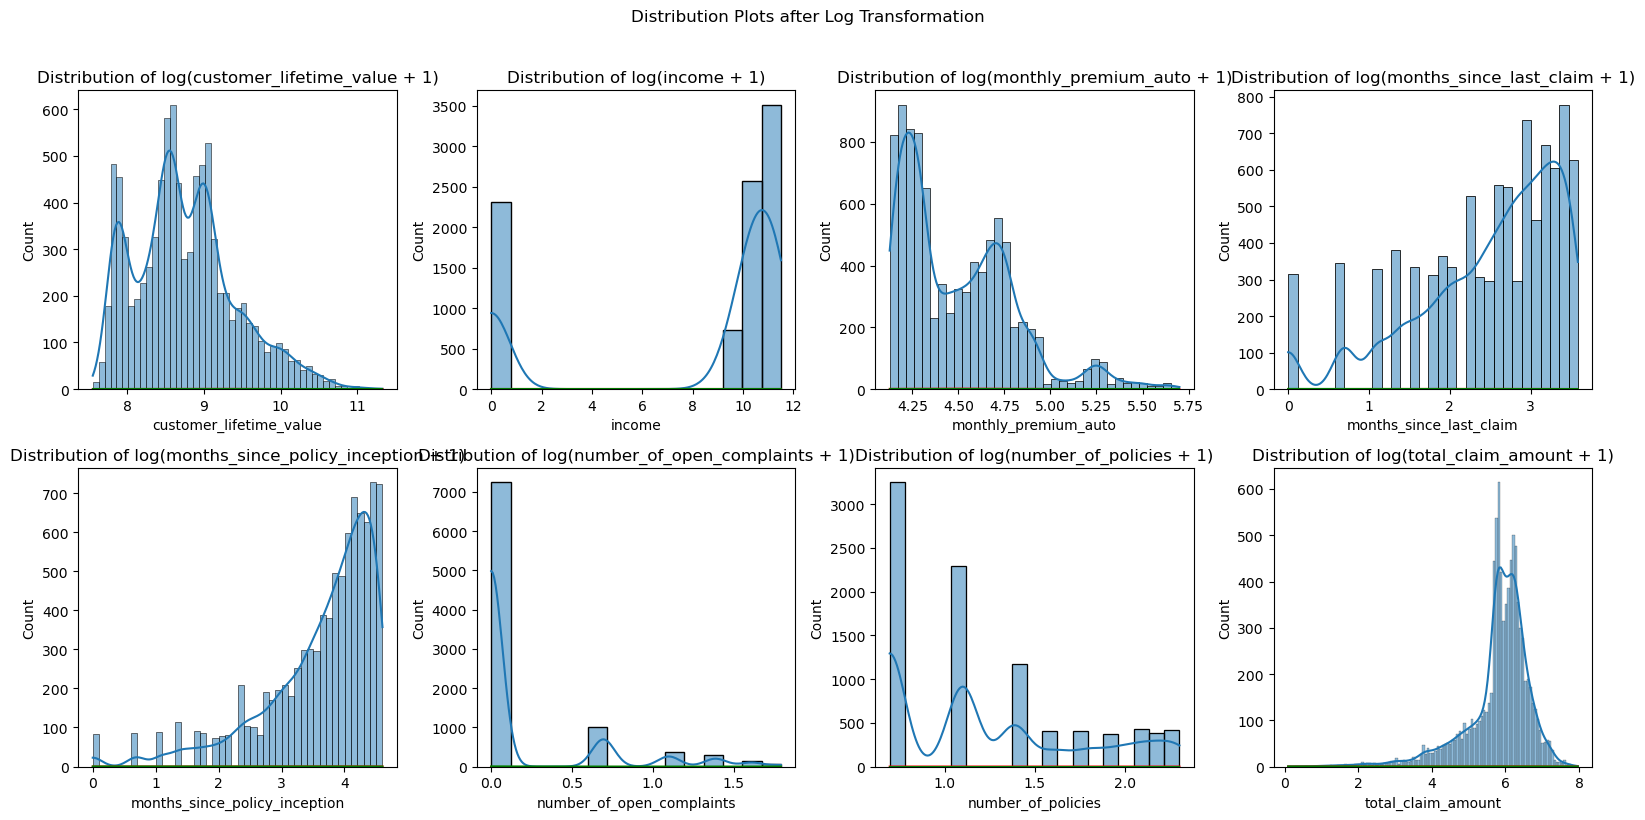

In [14]:
# Apply log transformation to the data
df_log_transformed = np.log1p(numerical[columns_to_plot])

# Set up the subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.suptitle('Distribution Plots after Log Transformation', y=1.02)

# Create distribution plots for each transformed column
for col, ax in zip(columns_to_plot, axes.flatten()):
    sns.histplot(df_log_transformed[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of log({col} + 1)')
 # Add theoretical normal curve
    x = np.linspace(df_log_transformed[col].min(), df_log_transformed[col].max(), 1000)
    normal_curve = norm.pdf(x, loc=df_log_transformed[col].mean(), scale=df_log_transformed[col].std())
    ax.plot(x, normal_curve, color='red', label='Theoretical Normal Curve')
    
    # Add theoretical exponential curve
    exponential_curve = expon.pdf(x, scale=df_log_transformed[col].mean())  # Exponential distribution with mean as scale parameter
    ax.plot(x, exponential_curve, color='green', label='Theoretical Exponential Curve')
    
# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
##CONCLUSION##
#exponential distribution: 
    #months_since_policy_inception(++) 
    #customer_lifetime_value (monthly_premium_auto) number_of_open_complaints, number_of_policies
#normal distribution:  total_claim_amount
#no specific distribution: income

## Further insight: Discrete/ Continuous

In [29]:
def discrete_continuous(df):
    discrete_lst = []
    continuous_lst = []
    for col in df.columns:
        if len(df[col].unique()) < (df.shape[0] * 0.02):
            discrete_lst.append(col)
        else:
            continuous_lst.append(col)
    return (discrete_lst, continuous_lst)
print('Discrete List:  ',discrete_lst)
print('Continuous List:   ',continuous_lst)
#Discrete List:   ['months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies']
#Continuous List:    ['customer_lifetime_value', 'income', 'monthly_premium_auto', 'total_claim_amount']

Discrete List:   ['months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies']
Continuous List:    ['customer_lifetime_value', 'income', 'monthly_premium_auto', 'total_claim_amount']
